# Linear Regression Analysis
*Linear regression analysis using Pandas, StatsModels, and Altiar.*

**Attribution Notes**:
* Much of this analysis was inspired by [Cognitir](http://www.cognitir.com/)'s [Introduction to Data Science for Finance](http://www.cognitir.com/courses/data-science) course, which I attended at the Ohio State University in November 2016. I generated this notebook using notes I took during the couse to practice what I learned and add some other functions useful to me. The course provides a much more detailed presentation of the material, and I highly recommend it. I encourage you to [contact them](http://www.cognitir.com/contact) for more information.
* [Chris Albon](http://chrisalbon.com/python/pandas_join_merge_dataframe.html)'s blog is always a great resouce for questions about Pandas. 
* I always reference [Dan Saber's examples](https://github.com/dsaber/py-viz-blog/blob/master/5_altair_viz.ipynb) for plotting with Altair.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from altair import *

## Simple Linear Regression
*Linear regression to predict the dependent variable using one independent variable.* 

See more information on [Wikipedia here](https://en.wikipedia.org/wiki/Simple_linear_regression).

### Data
I found [this dataset](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr02.html), originally from *The Song of Insects* by Dr.G.W. Pierce (Harvard College Press), which gives the number of chirps per second of the striped ground cricket at various temperatures. We start by reading this data into a dataframe.

In [7]:
df = pd.read_csv('data/cricket-chirps.csv')
df.tail()

,Temp (Deg F),Cricket Chirps/Sec
10,79.599998,15.000000
11,82.599998,17.200001
12,80.599998,16.000000
13,83.500000,17.000000
14,76.300003,14.400000


Let's plot this to see what the data looks like.

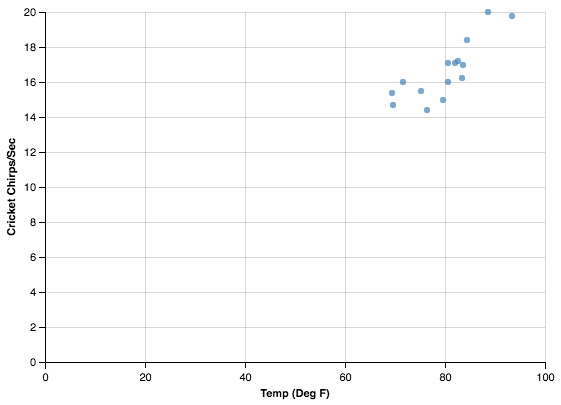

In [5]:
c = Chart(df).mark_point(filled=True).encode(
    x='Temp (Deg F)',
    y='Cricket Chirps/Sec'
)
c

Since a linear relationship appears to be present, we can run a simple linear regression so that we can predict how many cricket chirps per second we expect at a given temperature. 

In [6]:
X = df[['Temp (Deg F)']]
Y = df['Cricket Chirps/Sec']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

model.summary()

/Users/mkudija/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Cricket Chirps/Sec   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.97
Date:                Sun, 27 Nov 2016   Prob (F-statistic):           0.000107
Time:                        17:08:20   Log-Likelihood:                -19.777
No. Observations:                  15   AIC:                             43.55
Df Residuals:                      13   BIC:                             44.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.3091      3.109     -0.099      0.922        -7.025     6.407
Temp (Deg F)     0.2119      0.039      5.475      0.000         0.128     0.296
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.579
Skew:                          -0.196   Prob(JB):                        0.749
Kurtosis:                       2.121   Cond. No.                         995.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
help(model)

Help on RegressionResultsWrapper in module statsmodels.regression.linear_model object:

class RegressionResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Returns the confidence interval of the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The `alpha` level for the confidence interval.
 |          ie., The default `alpha` = .05 returns a 95% confidence interval.
 |      cols : array-like, optional
 |          `cols` specifies which confidence intervals to return
 |      
 |      Notes
 |      -----
 |      The confidence

Use this for multiple linear regression: [Using Technology: U.S. Economy Case Study](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html), originally from *Statistical Abstract of the United States*, 103rd and 109th ediiton.
        
        

In [12]:
df = pd.read_csv('data/faculty-data.csv')
df.tail()

,Faculty,Salary,Gender,Rank,Dept,Years,Merit
26,27.0,59.0,0.0,3.0,3.0,0.0,2.88
27,28.0,65.0,1.0,2.0,3.0,5.0,3.37
28,29.0,49.0,0.0,1.0,3.0,0.0,2.84
29,30.0,37.0,1.0,1.0,1.0,9.0,5.12
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Multiple Linear Regression
*Linear regression to predict the dependent variable using multiple (including categorical) independent variables.*

See [this post from DataRobot](https://www.datarobot.com/blog/multiple-regression-using-statsmodels/) and [Scipy Lecture Notes](http://www.scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html) for examples.

In [ ]:
df_adv = pd.read_csv('data/Advertising.csv', parse_dates=True, index_col=0)
df_adv.head()

In [ ]:
X = df_adv[['Facebook', 'Twitter','LinkedIn']]
Y = df_adv['Sales']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

model.summary()

In [ ]:
df_reg = pd.DataFrame({ 'X' : range(1, 300 + 1 ,1)})
df_reg[['Facebook-reg']] = df_reg[['X']] * model.params[1]
df_reg[['Twitter-reg']] = df_reg[['X']] * model.params[2]
df_reg[['LinkedIn-reg']] = df_reg[['X']] * model.params[3]

df_reg.head()

In [ ]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='Facebook-reg',
)

In [ ]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='Twitter-reg',
)

In [ ]:
Chart(df_reg).mark_circle().encode(
    x='X',
    y='LinkedIn-reg',
)

# Credit

In [ ]:
import statsmodels.formula.api as smf

df_crd = pd.read_csv('data/Credit.csv', parse_dates=True, index_col=0)
df_crd.head()

In [ ]:
model = smf.ols(formula='Rating ~ Income + Limit + Cards + Age + Education + C(Gender) + C(Student) + '
                'C(Married) + C(Ethnicity) + Balance', data=df_crd).fit()

model.summary()

From the results, we see that the following attributes contribute to a higher credit rating:
- being female
- not being a student
- being married
- not being Asian or Caucasian
- having a higher income
- having a higher credit limit
- having more cards
- being older
- not having more education
- having a higher balance